# Predictive Data Analysis; Assignment 2
<h3 style = "color:gray;">Tejas Ashok Shinde</h3>
<h3 style = "color:gray;">MSc CA - Data Science</h3>
<h3 style = "color:gray;">18030142<font style = "color:red;">037</font></h3>
<hr style = "height:1px">

# About the Data
<table style="width:80%">
    <tr>
        <th>Name</th>
        <th>Source</th>
        <th>Size</th>
        <th>Dimensions</th>
  </tr>
  <tr>
      <td>FIFA 19</td>
      <td>Kaggle</td>
      <td>8926 KB</td>
      <td>18207 x 89</td>
  </tr>
</table> 

# Problem Statement
<h3 style = "color:blue;">i) Exploratory Data Analysis.</h3> 
<h3 style = "color:blue;">ii) Plotting conclusions.</h3>
<h3 style = "color:blue;">iii) Predicting the POSITION of the player given all the physical as well as a handful of mental attributes.</h3>
<hr style = "height:1px">

### IMPORTS

In [1]:
import pandas
import seaborn
from matplotlib import pyplot
from matplotlib import style
import numpy
import re

<h1 style = 'color:lightgreen'>i) Exploratory Data Analysis</h1>

In [2]:
data = pandas.read_csv('./data/FIFA 19/data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Data Description

In [3]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [4]:
data.shape

(18207, 89)

In [5]:
data.Overall.describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [6]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
data['Position'].head()

0     RF
1     ST
2     LW
3     GK
4    RCM
Name: Position, dtype: object

## Deletion of columns based on following direct observations
<table style="width:50%">
    <tr>
        <th>Columns</th>
        <th>Reason of deletion</th>
    </tr>
    <tr>
        <td>Unnamed: 0 & ID</td>
        <td>We don't need an ID of a player for analysis. For plotting purpose, we can just use their names on the axis which in fact gives a better understanding of who he/she is rather than a numeric ID given to that player</td>
    </tr>
    <tr>
        <td>Photo , Flag , Club Logo</td>
        <td>It is a kind of BLOB storage, storing only the links to the images or logos in this case. So this data is not useful as such for EDA or making predictions</td>
    </tr>
    <tr>
        <td>Special , International Reputation , Work Rate , Body Type , Real Face , Jersey Number , Loaned From , Contract Valid Until , Release Clause</td>
        <td>Columns mentioned are not inputs to the plots or observations needed, and would not matter even after removing for further classification problem </td>
    </tr>
    <tr>
        <td>Height and Weight (Partial)</td>
        <td>Height and Weight are one of the most important features, but in this case, as per my observation and facts, for this game these particular features can't decide the position of a player. Say for instance a defender with a good height is a decent defender, but some defenders are short and swift, making them fast and in turn can get the ball back in possession sooner.
        We will be plotting some conclusions which include height and weight for the same reason</td>
    </tr>
    <tr>
        <td>Position</td>
        <td>We will be predicting the position of the player, a generalized one. For instance if the position is RF, CF or so on, then we will be categorizing all such positions as Forwards. Similarly for RB (Right Back), CB(Center Back) we can catgorize them into defenders. We will be doing this later using other columns so we won't need the player's position, but for checking if our predictions are correct, we can come back here</td>
    </tr>
    'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'
    <tr>
        <td>GKDiving , GKHandling , GKKicking , GKPositioning , GKReflexes</td>
        <td>Goalkeepers are not a part of our classification data, hence eliminating the same. Reason behind it is that We can straight up predict GoalKeepers using just the GK... attriutes. While in other cases, they cause a confusion whether the player is a midfielder or attacker.</td>
    </tr>
</table> 

In [8]:
data.drop(['Unnamed: 0' , 'Photo' , 'Flag' ,
           'Club Logo' , 'Special' , 'International Reputation' ,
           'Body Type' , 'Work Rate' , 'Real Face' ,
           'Jersey Number' , 'Loaned From' , 'Contract Valid Until' ,
           'Joined' , 'Release Clause' , 'GKDiving' ,
           'GKHandling' , 'GKKicking' , 'GKPositioning' ,
           'GKReflexes'] , axis = 1 , inplace = True)

In [9]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


## Checking and Handling the NA values

In [10]:
data.isna().sum()

ID                    0
Name                  0
Age                   0
Nationality           0
Overall               0
Potential             0
Club                241
Value                 0
Wage                  0
Preferred Foot       48
Weak Foot            48
Skill Moves          48
Position             60
Height               48
Weight               48
LS                 2085
ST                 2085
RS                 2085
LW                 2085
LF                 2085
CF                 2085
RF                 2085
RW                 2085
LAM                2085
CAM                2085
RAM                2085
LM                 2085
LCM                2085
CM                 2085
RCM                2085
                   ... 
RB                 2085
Crossing             48
Finishing            48
HeadingAccuracy      48
ShortPassing         48
Volleys              48
Dribbling            48
Curve                48
FKAccuracy           48
LongPassing          48
BallControl     

## This data is divided in a structure shown below :

<hr style = "height:1px">
<ul>
     <li>Demographic and Descriptive (Tells about players behaviour and facts)</li>
        <ul>
            <li>Name, club, weak foot, etc.</li>
        </ul> 
    <li>Positional Attributes (Tells about the stats of the player on pitch in his/her position)</li>
        <ul>
            <li>All the shortforms we see in the data like LS(Left Striker), ST(Striker), RCM(Right Center Mid)</li>
        </ul>
    <li>Physical Attributes</li>
        <ul>
            <li>These are the numeric attributes which represent each and every aspect of the player on field, based on the performance of the player in the match</li>
        </ul>
</ul> 

<hr style = "height:1px">

<h3 style = "color:gray"> The null value columns and how they will be handled </h3>

<table style="width:50%">
    <tr>
        <th>Columns</th>
        <th>Handling Null(s)</th>
    </tr>
    <tr>
        <td>Club : 241 Nulls</td>
        <td>The Club attribute has nulls, which means there are 241 players which are not assigned to any particular club. So in this case we can replace the null's with something like 'Not Assigned Yet (NAY)'</td>
    </tr>
    <tr>
        <td>Shortforms for positions (Positional Attributes) : 2085 Nulls each</td>
        <td>As we do not have a base for further prediction and analysis we will be removing these rows, because most of the numeric columns of these rows are NA's, making the data itself insufficient for analysis and prediction</td>
    </tr>
    <tr>
        <td>Physical Attributes : 48 nulls each</td>
        <td>Again adding to the above reason, if these columns are null's collectively, then it affects the analysis on a high scale as they define the player's performance. One of the main reason is also because the goalkeepers are analysed on the basis of GK... attributes in the table previously</td>
    </tr>
</table>
<hr style = "height:1px">

In [11]:
checkpoint = data

In [12]:
data.loc[: , 'Club'].fillna('Not Assigned Yet' , inplace = True)
data.dropna(subset = data.loc[: , 'LS' : 'RB'].columns , inplace = True)

In [13]:
# data.loc[: , 'LS' : 'RB'].isna().sum()

### After dropping to check whether we have dropped the right amount of rows we can take a simple difference of original shape and current shape, which is 2085. So this means that when the Positional Attributes were dropped, those rows also contained na values of the physical attributes. (2085 nulls 'contained' the 48 nulls of each row)

In [14]:
data.shape

(16122, 70)

## We have handled all the NA values

In [15]:
data.isna().sum()

ID                 0
Name               0
Age                0
Nationality        0
Overall            0
Potential          0
Club               0
Value              0
Wage               0
Preferred Foot     0
Weak Foot          0
Skill Moves        0
Position           0
Height             0
Weight             0
LS                 0
ST                 0
RS                 0
LW                 0
LF                 0
CF                 0
RF                 0
RW                 0
LAM                0
CAM                0
RAM                0
LM                 0
LCM                0
CM                 0
RCM                0
                  ..
RB                 0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower    

In [16]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'Position', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF',
       'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB',
       'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

## Heatmap
The columns have quite low co-relation, and they are independant of each other as they depend on the players' form too. These are the physical attributes and hence independant of each other

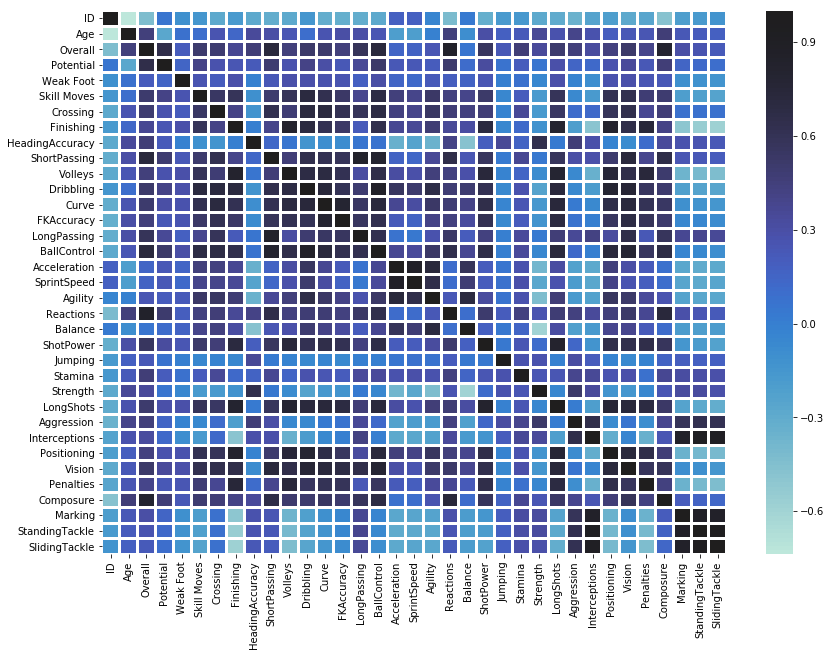

In [17]:
custom_dimension = (14 , 10)
fig , ax = pyplot.subplots(figsize = custom_dimension)
corr = data.corr()
seaborn.heatmap(corr , xticklabels = corr.columns.values , yticklabels = corr.columns.values , center = 1 , linewidths = 2 , ax = ax)

In [18]:
high_corr_pairs = numpy.where(corr > 0.92)
high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]
low_corr_pairs = numpy.where(corr < 0.2)
low_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*low_corr_pairs) if x != y and x < y]

high_corr_pairs

[('Interceptions', 'StandingTackle'), ('StandingTackle', 'SlidingTackle')]

As we can see above, the high correlation pair(s) , above .92 are just 2 pairs. So we can delete one of the three columns.
As standing tackle is common in both of them, we can simply just keep that column and remove the other 2

Below is the graph which shows their relation

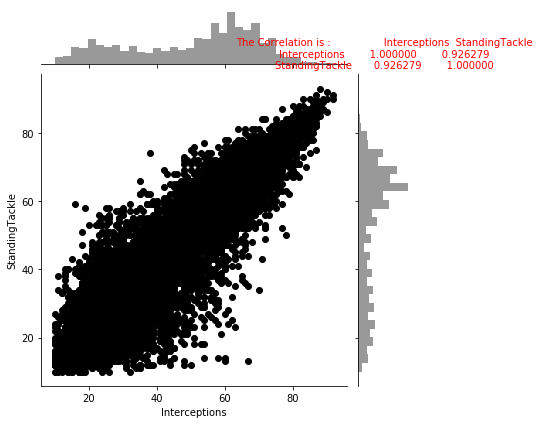

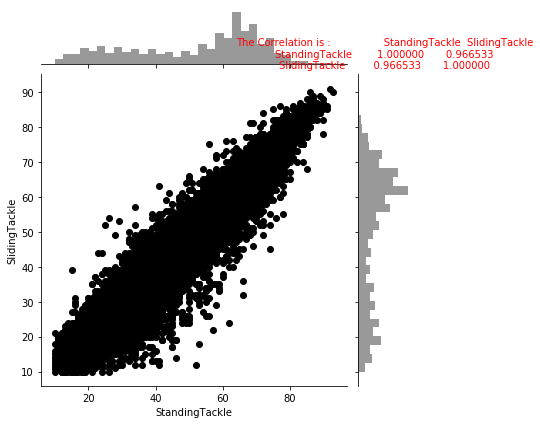

In [19]:
for names in high_corr_pairs:
    seaborn.jointplot(data[names[0]] , data[names[1]] , color='Black' , kind = 'scatter')
    pyplot.title("The Correlation is : " + str(data[[names[0],names[1]]].corr()) , fontdict = {'size' : 10 , 'color' : 'red'})

KDE plot helps us to visualize clear correlation between the stated columns

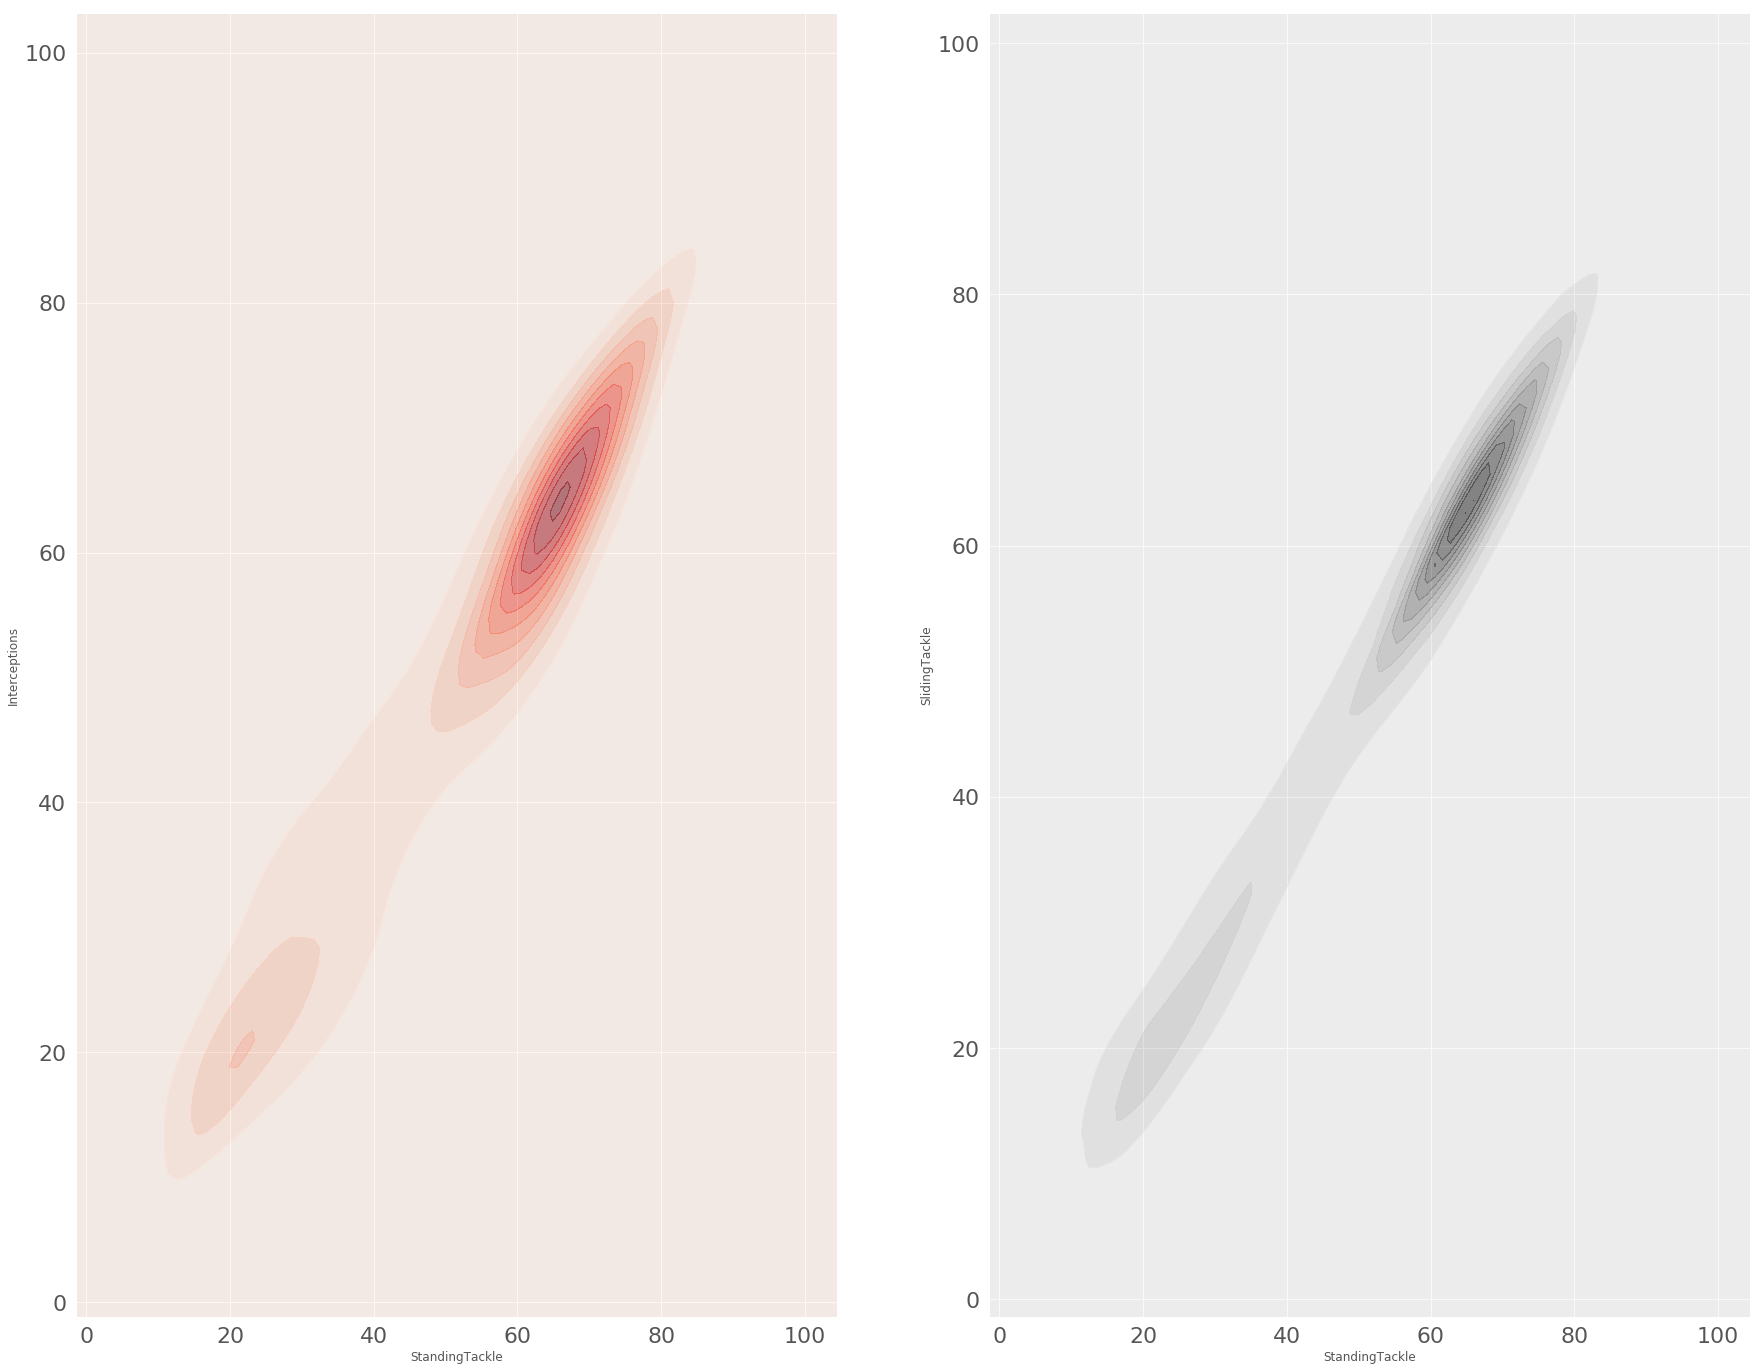

In [20]:
seaborn.set_context('talk' , font_scale = 3.5) 
seaborn.set(font_scale = 2.0)
style.use('ggplot')
pyplot.figure(figsize = (30 , 24))

pyplot.subplot(1 , 2 , 1)
seaborn.kdeplot(data['StandingTackle'] , data['Interceptions'] , cmap = 'Reds' , alpha = 0.5 , shade = True , label = 'REd')
 

pyplot.subplot(1 , 2 , 2)
seaborn.kdeplot(data['StandingTackle'] , data['SlidingTackle'] , cmap = 'binary' , alpha = 0.5 , shade = True)

Deleting 2 uncommon features of the 3 highly related features

In [21]:
data.drop(['SlidingTackle' , 'Interceptions'] , axis = 1 , inplace = True)

## Converting currencies to numeric values
The Wage and Value columns have letters which represent 10's value. We have to convert them to numbers for plotting and analysis

In [22]:
data[['Wage' , 'Value']].head()

,Wage,Value
0,€565K,€110.5M
1,€405K,€77M
2,€290K,€118.5M
4,€355K,€102M
5,€340K,€93M


Functions for converting Wages and Values to float values

In [23]:
# float(re.sub(r'(?i)\b(\d+) ?m(?:m?)?\b', r'\g<1>000000', re.sub("[^0-9|.M]" , "" ,  '€60M')).replace('.' , ''))

In [24]:
def convert_value(value):
    return int(re.sub(r'(?i)\b(\d+) ?m(?:m?)?\b', r'\g<1>000000', re.sub("[^0-9|.M]" , "" , value)).replace('.' , ''))

def convert_wage(wage):
    return int(re.sub(r'(?i)\b(\d+) ?k(?:k?)?\b', r'\g<1>000', re.sub("[^0-9|.K]" , "" , wage)).replace('.' , ''))

In [25]:
data['Wage'] = data['Wage'].apply(lambda x : int(convert_value(x)) if x.find('K') is -1 else int(convert_wage(x)))
data['Value'] = data['Value'].apply(lambda x : int(convert_value(x)) if x.find('K') is -1 else int(convert_wage(x)))

In [26]:
data[['Wage' , 'Value']].head()

,Wage,Value
0,565000,1105000000
1,405000,77000000
2,290000,1185000000
4,355000,102000000
5,340000,93000000


<h1 style = "color:lightgreen">ii) Visualization and Plotting Conclusions

<h4 style = "color:purple">1) Top 10 Highest Paid Players</h4>

In [27]:
top_10_paid_players = data[['Name' , 'Wage']].sort_values('Wage' , ascending = False).head(10)
top_10_paid_players

,Name,Wage
0,L. Messi,565000
7,L. Suárez,455000
6,L. Modrić,420000
1,Cristiano Ronaldo,405000
8,Sergio Ramos,380000
36,G. Bale,355000
4,K. De Bruyne,355000
11,T. Kroos,355000
32,Coutinho,340000
5,E. Hazard,340000


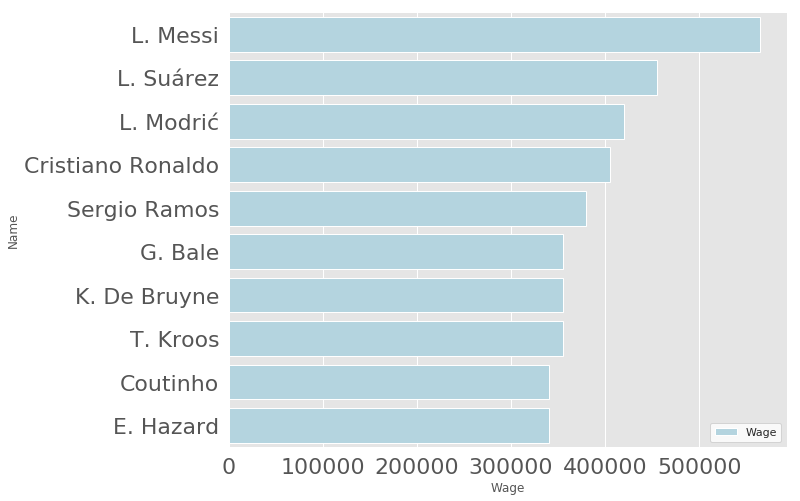

In [28]:
custom_dimension = (10 , 8)
fig , ax = pyplot.subplots(figsize = custom_dimension)
seaborn.set(style = "whitegrid")
seaborn.set_color_codes("muted")
seaborn.barplot(data = top_10_paid_players , x = "Wage", y = "Name" , label = "Wage" , color = "lightblue" , ax = ax)

ax.legend(ncol = 2, loc = "lower right", frameon = True)

<h4 style = "color:purple">2) Top 10 Highest Valued Clubs</h4>

In [29]:
top_10_valued_teams = data[['Club' , 'Value']].sort_values('Value' , ascending = False).head(10)
top_10_valued_teams

,Club,Value
2,Paris Saint-Germain,1185000000
0,FC Barcelona,1105000000
16,Tottenham Hotspur,835000000
11,Real Madrid,765000000
31,Tottenham Hotspur,735000000
30,Real Madrid,735000000
26,Liverpool,695000000
32,FC Barcelona,695000000
28,FC Bayern München,695000000
23,Manchester City,645000000


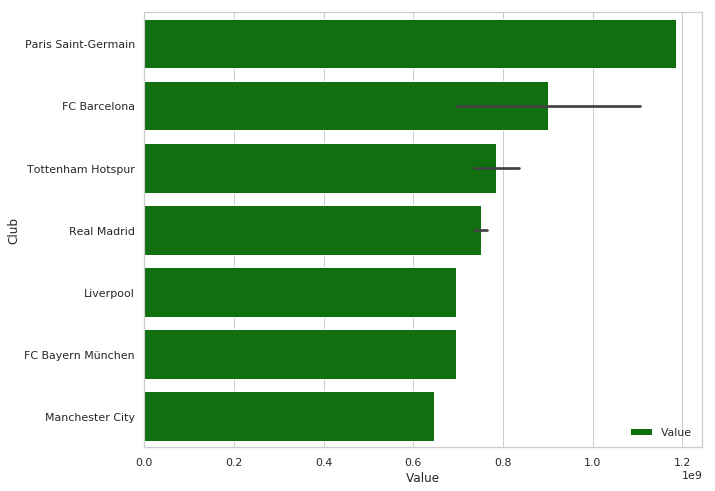

In [30]:
custom_dimension = (10 , 8)
fig , ax = pyplot.subplots(figsize = custom_dimension)
seaborn.barplot(data = top_10_valued_teams , x = "Value", y = "Club" , label = "Value" , color = "green" , ax = ax)

ax.legend(ncol = 2, loc = "lower right", frameon = False)

<h4 style = "color:purple">3) Age distribution of players in the field of soccer</h4>

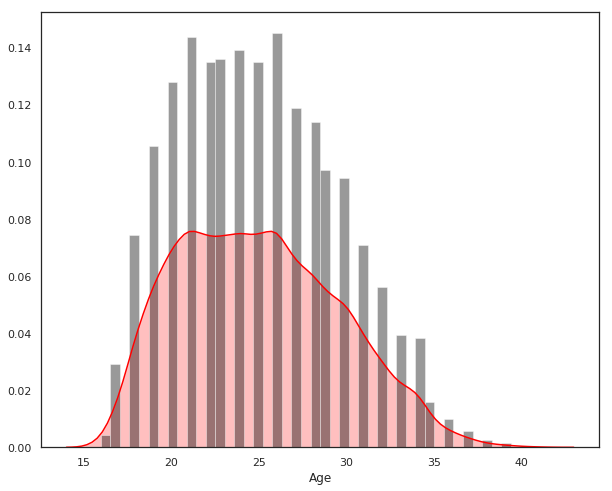

In [31]:
seaborn.set(style = "white")
custom_dimension = (10 , 8)
fig , ax = pyplot.subplots(figsize = custom_dimension)
seaborn.distplot(data['Age'] , hist = True, color = "black", kde_kws = {"shade": True , "color" : 'red'})

<h4 style = "color:purple">4) Age Wise comparisong with the Overall Attribute</h4>

The part which is darker as compared to the other shades in the graph, have a bigger Overall number than the other aged people, so players ranging form 20-30 have a better Overall performance than others

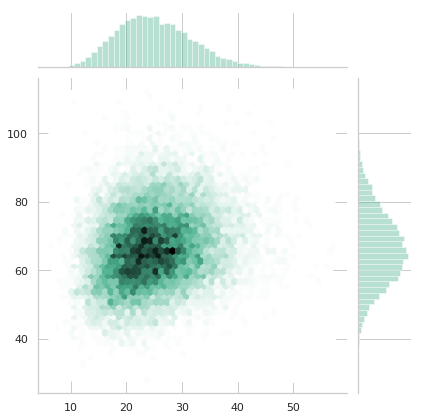

In [32]:
seaborn.set(style="whitegrid")

rs = numpy.random.RandomState(11)
x = rs.gamma(data['Age'])
y = rs.gamma(data['Overall'])

seaborn.jointplot(x , y , kind="hex", color="#4CB391")

The positions are spread out, so I have divided them in such a way that it divides all these positions in 3 parts

<h5> 0 -> Striker/Forward </h5>
<h5> 1 -> Midfielder </h5>
<h5> 2 -> Defender </h5>

In [33]:
forwards = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
midfielders = ['LAM', 'CAM','RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM','RWB']
defenders = ['LB', 'LCB', 'CB', 'RCB', 'RB']

data['Position'].unique()

array(['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM',
       'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

Function for categorizing the positions

In [34]:
def get_generalized_position(x):
    if x in forwards:
        return (0)
    if x in midfielders:
        return (1)
    if x in defenders:
        return (2)
    else:
        return (3)

In [35]:
data['Generalized Position'] = data['Position'].apply(lambda x : get_generalized_position(x))

In [36]:
data['Generalized Position'].head()

0    0
1    0
2    0
4    1
5    0
Name: Generalized Position, dtype: int64

<h4 style = "color:purple">5) Position wise wage dist. (Which positions are paid what amount)</h4>

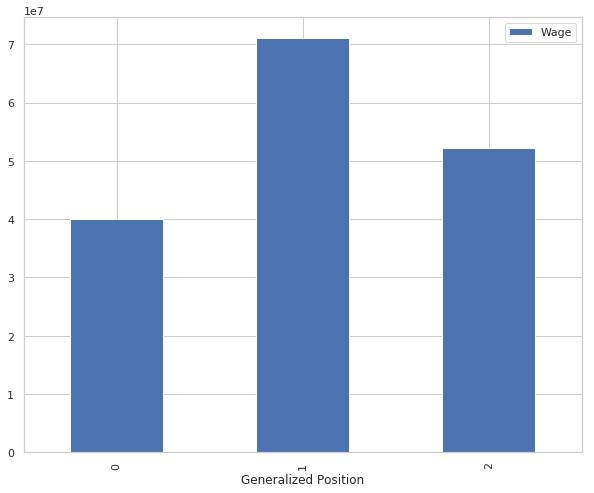

In [37]:
position_wage = data[['Generalized Position' , 'Wage']]
position_wage = position_wage.groupby('Generalized Position').sum().plot(kind = 'bar' , figsize = (10 , 8))

<h4 style = "color:purple">6) Nationwise distribution of players in the soccer domain</h4>

In [38]:
nationwise = data[['Nationality','ID']].groupby('Nationality').count().sort_values('ID' , ascending = False).head(10)

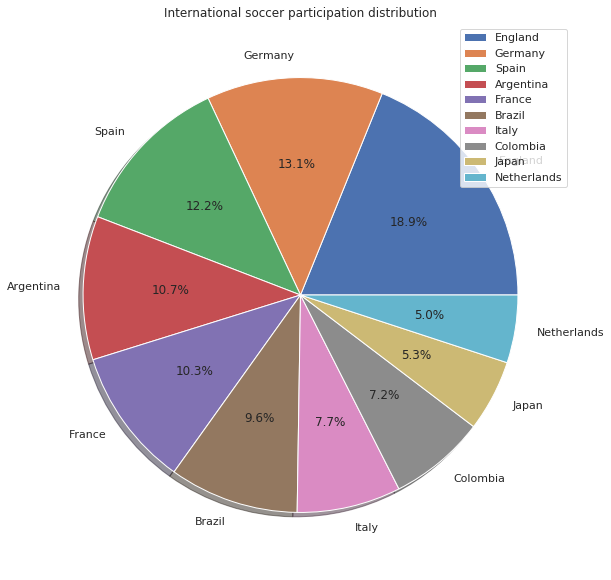

In [39]:
labels = nationwise.index
size = nationwise.ID
pyplot.figure(figsize = (12 , 10))
pyplot.pie(size , labels = labels , autopct = '%1.1f%%' , startangle = 0 , shadow = True)
pyplot.title('International soccer participation distribution')
pyplot.legend()

<h4 style = "color:purple">7) Best Defenders on paper (Mean of all the attributes) Top 25</h4>

The physical attributes are in a type as follows:

In [40]:
data[data['Generalized Position'] == 2].loc[: , 'RWB' : 'RB'].head()

,RWB,LB,LCB,CB,RCB,RB
8,81+3,84+3,87+3,87+3,87+3,84+3
12,76+3,79+3,87+3,87+3,87+3,79+3
24,74+3,77+3,86+3,86+3,86+3,77+3
34,78+3,80+3,85+3,85+3,85+3,80+3
35,85+3,84+3,81+3,81+3,81+3,84+3


So we need to convert them to float values for whoch a function is written below

In [41]:
def to_float(string):
    return (float(re.findall('(\d[^+])' , string)[0]))

In [42]:
to_float('81+3')

81.0

In [43]:
data[data['Generalized Position'] == 2].loc[: , 'RWB' : 'RB'].head()

,RWB,LB,LCB,CB,RCB,RB
8,81+3,84+3,87+3,87+3,87+3,84+3
12,76+3,79+3,87+3,87+3,87+3,79+3
24,74+3,77+3,86+3,86+3,86+3,77+3
34,78+3,80+3,85+3,85+3,85+3,80+3
35,85+3,84+3,81+3,81+3,81+3,84+3


In [44]:
list(data.columns[15:41])

['LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB']

In [45]:
for column in list(data.columns[15:41]):
    data[column] = data[column].apply(to_float)

In [46]:
defend_attr = data[data['Generalized Position'] == 2][['Name' , 'RWB' , 
                                                        'LB' , 'LCB' , 
                                                        'CB' , 'RCB' , 
                                                        'RB' , 'Aggression' , 
                                                        'StandingTackle' , 'Marking']]
defend_attr.head()

,Name,RWB,LB,LCB,CB,RCB,RB,Aggression,StandingTackle,Marking
8,Sergio Ramos,81.0,84.0,87.0,87.0,87.0,84.0,88.0,92.0,87.0
12,D. Godín,76.0,79.0,87.0,87.0,87.0,79.0,89.0,89.0,90.0
24,G. Chiellini,74.0,77.0,86.0,86.0,86.0,77.0,92.0,93.0,93.0
34,M. Hummels,78.0,80.0,85.0,85.0,85.0,80.0,69.0,90.0,88.0
35,Marcelo,85.0,84.0,81.0,81.0,81.0,84.0,84.0,85.0,71.0


Now we need a mean value, row wise of the defender attributes dataset

In [47]:
defend_attr['avg'] = defend_attr.loc[:, defend_attr.columns != 'Name'].apply(lambda x : numpy.mean(x) , axis = 1)
defend_attr_T10 = defend_attr.sort_values('avg' , ascending = False).head(10)
defend_attr_T10

,Name,RWB,LB,LCB,CB,RCB,RB,Aggression,StandingTackle,Marking,avg
8,Sergio Ramos,81.0,84.0,87.0,87.0,87.0,84.0,88.0,92.0,87.0,86.333333
24,G. Chiellini,74.0,77.0,86.0,86.0,86.0,77.0,92.0,93.0,93.0,84.888889
12,D. Godín,76.0,79.0,87.0,87.0,87.0,79.0,89.0,89.0,90.0,84.777778
69,Azpilicueta,83.0,84.0,83.0,83.0,83.0,84.0,82.0,90.0,88.0,84.444444
42,S. Umtiti,80.0,81.0,84.0,84.0,84.0,81.0,81.0,89.0,90.0,83.777778
51,J. Vertonghen,79.0,80.0,84.0,84.0,84.0,80.0,84.0,87.0,90.0,83.555556
71,T. Alderweireld,78.0,79.0,84.0,84.0,84.0,79.0,80.0,91.0,90.0,83.222222
59,V. van Dijk,76.0,78.0,85.0,85.0,85.0,78.0,81.0,89.0,88.0,82.777778
39,Thiago Silva,78.0,80.0,84.0,84.0,84.0,80.0,76.0,89.0,88.0,82.555556
34,M. Hummels,78.0,80.0,85.0,85.0,85.0,80.0,69.0,90.0,88.0,82.222222


Based on the average we will plot the top 10 defenders on paper/statistically

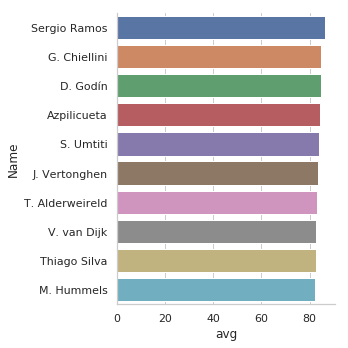

In [48]:
seaborn.catplot(x = "avg" , y = "Name" , kind = "bar" , data = defend_attr_T10);

# Using classification algorithms for making 'Position' prediction based on attributes

In [49]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'Position', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF',
       'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB',
       'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'Generalized Position'],
      dtype='object')

### <font style = "color:blue;"> The 'Y' here in our dataset will be 'Generalized Position'  </font>
<hr style = "height:1px">

<table style="width:40%">
    <tr>
        <th>Class</th>
        <th>Description</th>
  </tr>
  <tr>
      <td>0</td>
      <td>Striker/Forward</td>
  </tr>
  <tr>
      <td>1</td>
      <td>Midfielder</td>
  </tr>
  <tr>
      <td>2</td>
      <td>Defender</td>
  </tr>
</table> 

<hr style = "height:1px">

### <font style = "color:blue;"> The 'X'(s) here are all the values, physical attributes  </font>
['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle']

In [50]:
y = data['Generalized Position']
X = data[[      'Crossing', 'Finishing',
                'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                'Balance', 'ShotPower', 'Jumping', 'Stamina',
                'Strength', 'LongShots', 'Aggression', 'Positioning',
                'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle']]

### Checking if all the columns are float values

In [51]:
X.dtypes

Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
dtype: object

### Function for storing classification report

In [52]:
def classification_report_csv(filename , report):
#     header = model.kernel
#     with open(filename , 'a') as file:
#         file.write('Classification report for kernel type : ' + header + '\n')
    report_data = []
    lines = report.split('\n')
    for line in lines[2:5]:
            row = {}
            row_data = line.split('      ')
            row['class'] = row_data[1].split()[0]
            row['precision'] = float(row_data[2])
            row['recall'] = float(row_data[3])
            row['f1_score'] = float(row_data[4])
            row['support'] = float(row_data[5])
            report_data.append(row)
    dataframe = pandas.DataFrame.from_dict(report_data)
    dataframe.to_csv(filename , index = False , mode = 'a')

# <font style = "color:indianred"> <u>Support Vector Machine</u> </font>

In [53]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [54]:
pca = PCA(n_components = 15)
X = pca.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.20 )

#### Parameters
<hr style = "height:1px">
##### C : Regularization Parameter
##### Kernel : It specifies the kernel type ['linear' , 'poly' , 'rbf' , 'sigmoid']
<hr style = "height:1px">

<h3 style="color:skyblue">NOTE : linear takes about 4-5 mins, sigmoid takes upto 10 seconds and rbf takes upto 25 seconds for processing</h3>

In [56]:
model = SVC(kernel = 'linear')  
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [57]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 519  140    2]
 [  95 1226  103]
 [   1  113 1026]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       661
           1       0.83      0.86      0.84      1424
           2       0.91      0.90      0.90      1140

   micro avg       0.86      0.86      0.86      3225
   macro avg       0.86      0.85      0.85      3225
weighted avg       0.86      0.86      0.86      3225



##### Saving the reports in a file

In [58]:
filename = './tmp/classification_report_svm.csv'
classification_report_csv(filename , classification_report(y_test, y_pred))

In [59]:
with open(filename , 'r') as file:
    print(file.read())

Classification report for kernel type : sigmoid
class,f1_score,precision,recall,support
0,0.54,0.44,0.68,647.0
1,0.51,0.61,0.45,1439.0
2,0.58,0.58,0.6,1139.0
Classification report for kernel type : linear
class,f1_score,precision,recall,support
0,0.79,0.82,0.76,647.0
1,0.83,0.82,0.85,1439.0
2,0.9,0.89,0.9,1139.0
Classification report for kernel type : rbf,,,,
class,f1_score,precision,recall,support
0,0.0,0.0,0.0,698.0
1,0.61,0.44,1.0,1412.0
2,0.0,0.0,0.0,1115.0
class,f1_score,precision,recall,support
0,0.81,0.84,0.79,661.0
1,0.84,0.83,0.86,1424.0
2,0.9,0.91,0.9,1140.0



In [60]:
accuracy_score(y_test , y_pred)

0.8592248062015504

<hr style = "height:1px">
##### Support Vector Machine Breakdown; According to the data recorded, the 'Linear Kernel' with C=1.0 , degree = 3, gamma = 'auto deprecated' gives us better results than other kernel types with an accuracy score of 0.8592248062015504
<hr style = "height:1px">

# <font style = "color:indianred"> <u>Naive Bayes</u> </font>

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
model = GaussianNB()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [63]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 484  169    8]
 [ 101 1210  113]
 [   2  158  980]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.78       661
           1       0.79      0.85      0.82      1424
           2       0.89      0.86      0.87      1140

   micro avg       0.83      0.83      0.83      3225
   macro avg       0.83      0.81      0.82      3225
weighted avg       0.83      0.83      0.83      3225



In [64]:
accuracy_score(y_test , y_pred)

0.8291472868217055

In [65]:
filename = './tmp/classification_report_naive_bayes.csv'
classification_report_csv(filename , classification_report(y_test, y_pred))

In [66]:
with open(filename , 'r') as file:
    print(file.read())

class,f1_score,precision,recall,support
0,0.77,0.84,0.72,669.0
1,0.81,0.77,0.85,1430.0
2,0.86,0.88,0.83,1126.0
class,f1_score,precision,recall,support
0,0.78,0.82,0.73,661.0
1,0.82,0.79,0.85,1424.0
2,0.87,0.89,0.86,1140.0



<hr style = "height:1px">
##### Naive Bayes Breakdown; The accuracy score for this model is 0.8291472868217055 (No hyperparameters to be tuned)
<hr style = "height:1px">

# <font style = "color:indianred"> <u>K-Nearest Neighbors</u> </font>

In [67]:
from sklearn.neighbors import KNeighborsClassifier  

#### Parameters
<hr style = "height:1px">
##### n_neighbors : Number of neighbors
<hr style = "height:1px">

In [68]:
model = KNeighborsClassifier(n_neighbors = 10)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [69]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 536  122    3]
 [ 121 1212   91]
 [   1  138 1001]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       661
           1       0.82      0.85      0.84      1424
           2       0.91      0.88      0.90      1140

   micro avg       0.85      0.85      0.85      3225
   macro avg       0.85      0.85      0.85      3225
weighted avg       0.85      0.85      0.85      3225



In [70]:
accuracy_score(y_test , y_pred)

0.8524031007751938

In [71]:
filename = './tmp/classification_report_knn.csv'
with open(filename , 'a') as file:
    file.write('n_neighbors : ' +
               str(model.n_neighbors) +
               "\n" + "accuracy_score : " +
               str(accuracy_score(y_test , y_pred)) + '\n')
classification_report_csv(filename , classification_report(y_test, y_pred))

In [72]:
with open(filename , 'r') as file:
    print(file.read())

n_neighbors : 1
accuracy_score : 0.7841860465116279
class,f1_score,precision,recall,support
0,0.74,0.73,0.74,669.0
1,0.76,0.76,0.76,1430.0
2,0.84,0.85,0.84,1126.0
n_neighbors : 2
accuracy_score : 0.7674418604651163
class,f1_score,precision,recall,support
0,0.74,0.66,0.85,669.0
1,0.74,0.74,0.74,1430.0
2,0.82,0.9,0.75,1126.0
n_neighbors : 3
accuracy_score : 0.8251162790697675
class,f1_score,precision,recall,support
0,0.78,0.79,0.76,669.0
1,0.81,0.8,0.81,1430.0
2,0.88,0.87,0.88,1126.0
n_neighbors : 4
accuracy_score : 0.8133333333333334
class,f1_score,precision,recall,support
0,0.78,0.74,0.82,669.0
1,0.79,0.79,0.8,1430.0
2,0.86,0.9,0.83,1126.0
n_neighbors : 5
accuracy_score : 0.830077519379845
class,f1_score,precision,recall,support
0,0.78,0.8,0.75,669.0
1,0.81,0.8,0.82,1430.0
2,0.88,0.88,0.89,1126.0
n_neighbors : 6
accuracy_score : 0.827906976744186
class,f1_score,precision,recall,support
0,0.79,0.77,0.81,669.0
1,0.81,0.8,0.81,1430.0
2,0.88,0.9,0.86,1126.0
n_neighbors : 7
accuracy_score :

<hr style = "height:1px">
##### KNN Breakdown; According to the data recorded, best results were observed with 9 n_neigbors with an accuracy score of 0.8437209302325581
<hr style = "height:1px">

<form>
 <fieldset>
  <legend style = "color:gray">Conclusion</legend>
    <font style="color:black"> Conclusion : The best score observed is <b><u>0.8592248062015504</u></b>, using <b><u>Support Vector Machine</u></b> with a kernel type of Linear nature (amongst SVM , KNN , Naive Bayes)</font>
 </fieldset>
</form>